<a href="https://colab.research.google.com/github/HendrixOB/Proyecto1/blob/main/Proyecto/Proyecto_I_Estrellas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Paqueterias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import statsmodels.stats as sms

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Cargamos la base de datos
star_type = pd.read_csv("Stars.csv")

In [3]:
#Vemos si hay contenido nulo
pd.DataFrame(star_type.isnull().sum(), columns=["Contenido nulo"])

,Contenido nulo
Temperature,0
L,0
R,0
A_M,0
Color,0
Spectral_Class,0
Type,0


In [4]:
#Las variables categoricas las hacemos numericas
star_type.Color.astype("category")
star_type.Color = star_type.Color.astype("category").cat.codes

In [5]:
star_type.Spectral_Class.astype("category")
star_type.Spectral_Class = star_type.Spectral_Class.astype("category").cat.codes

In [6]:
#Comprobamos
star_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    int8   
 5   Spectral_Class  240 non-null    int8   
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), int8(2)
memory usage: 10.0 KB


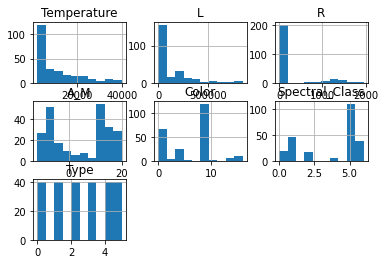

In [7]:
star_type.hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


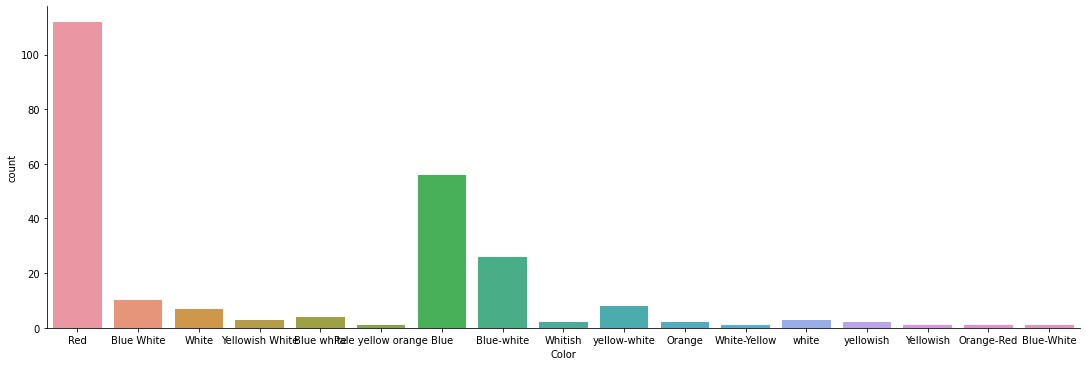

In [8]:
stardust = pd.read_csv("Stars.csv")
sb.factorplot('Color',data=stardust,kind="count", aspect=3)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


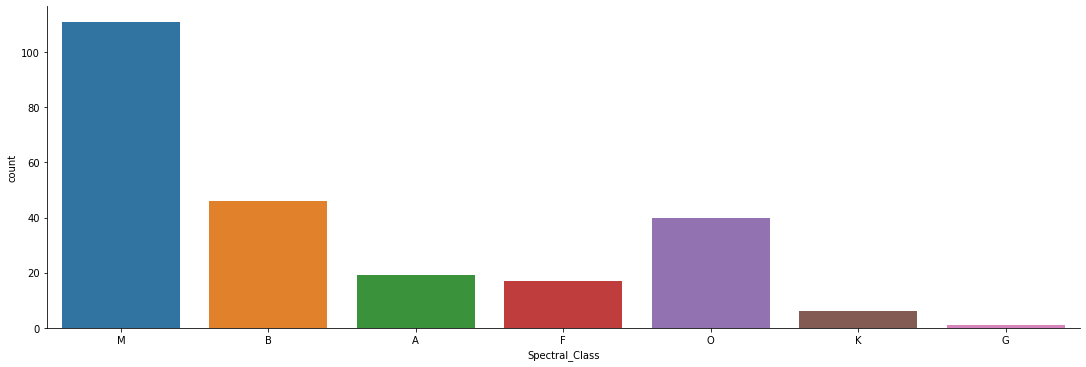

In [9]:
stardust = pd.read_csv("Stars.csv")
sb.factorplot('Spectral_Class',data=stardust,kind="count", aspect=3)

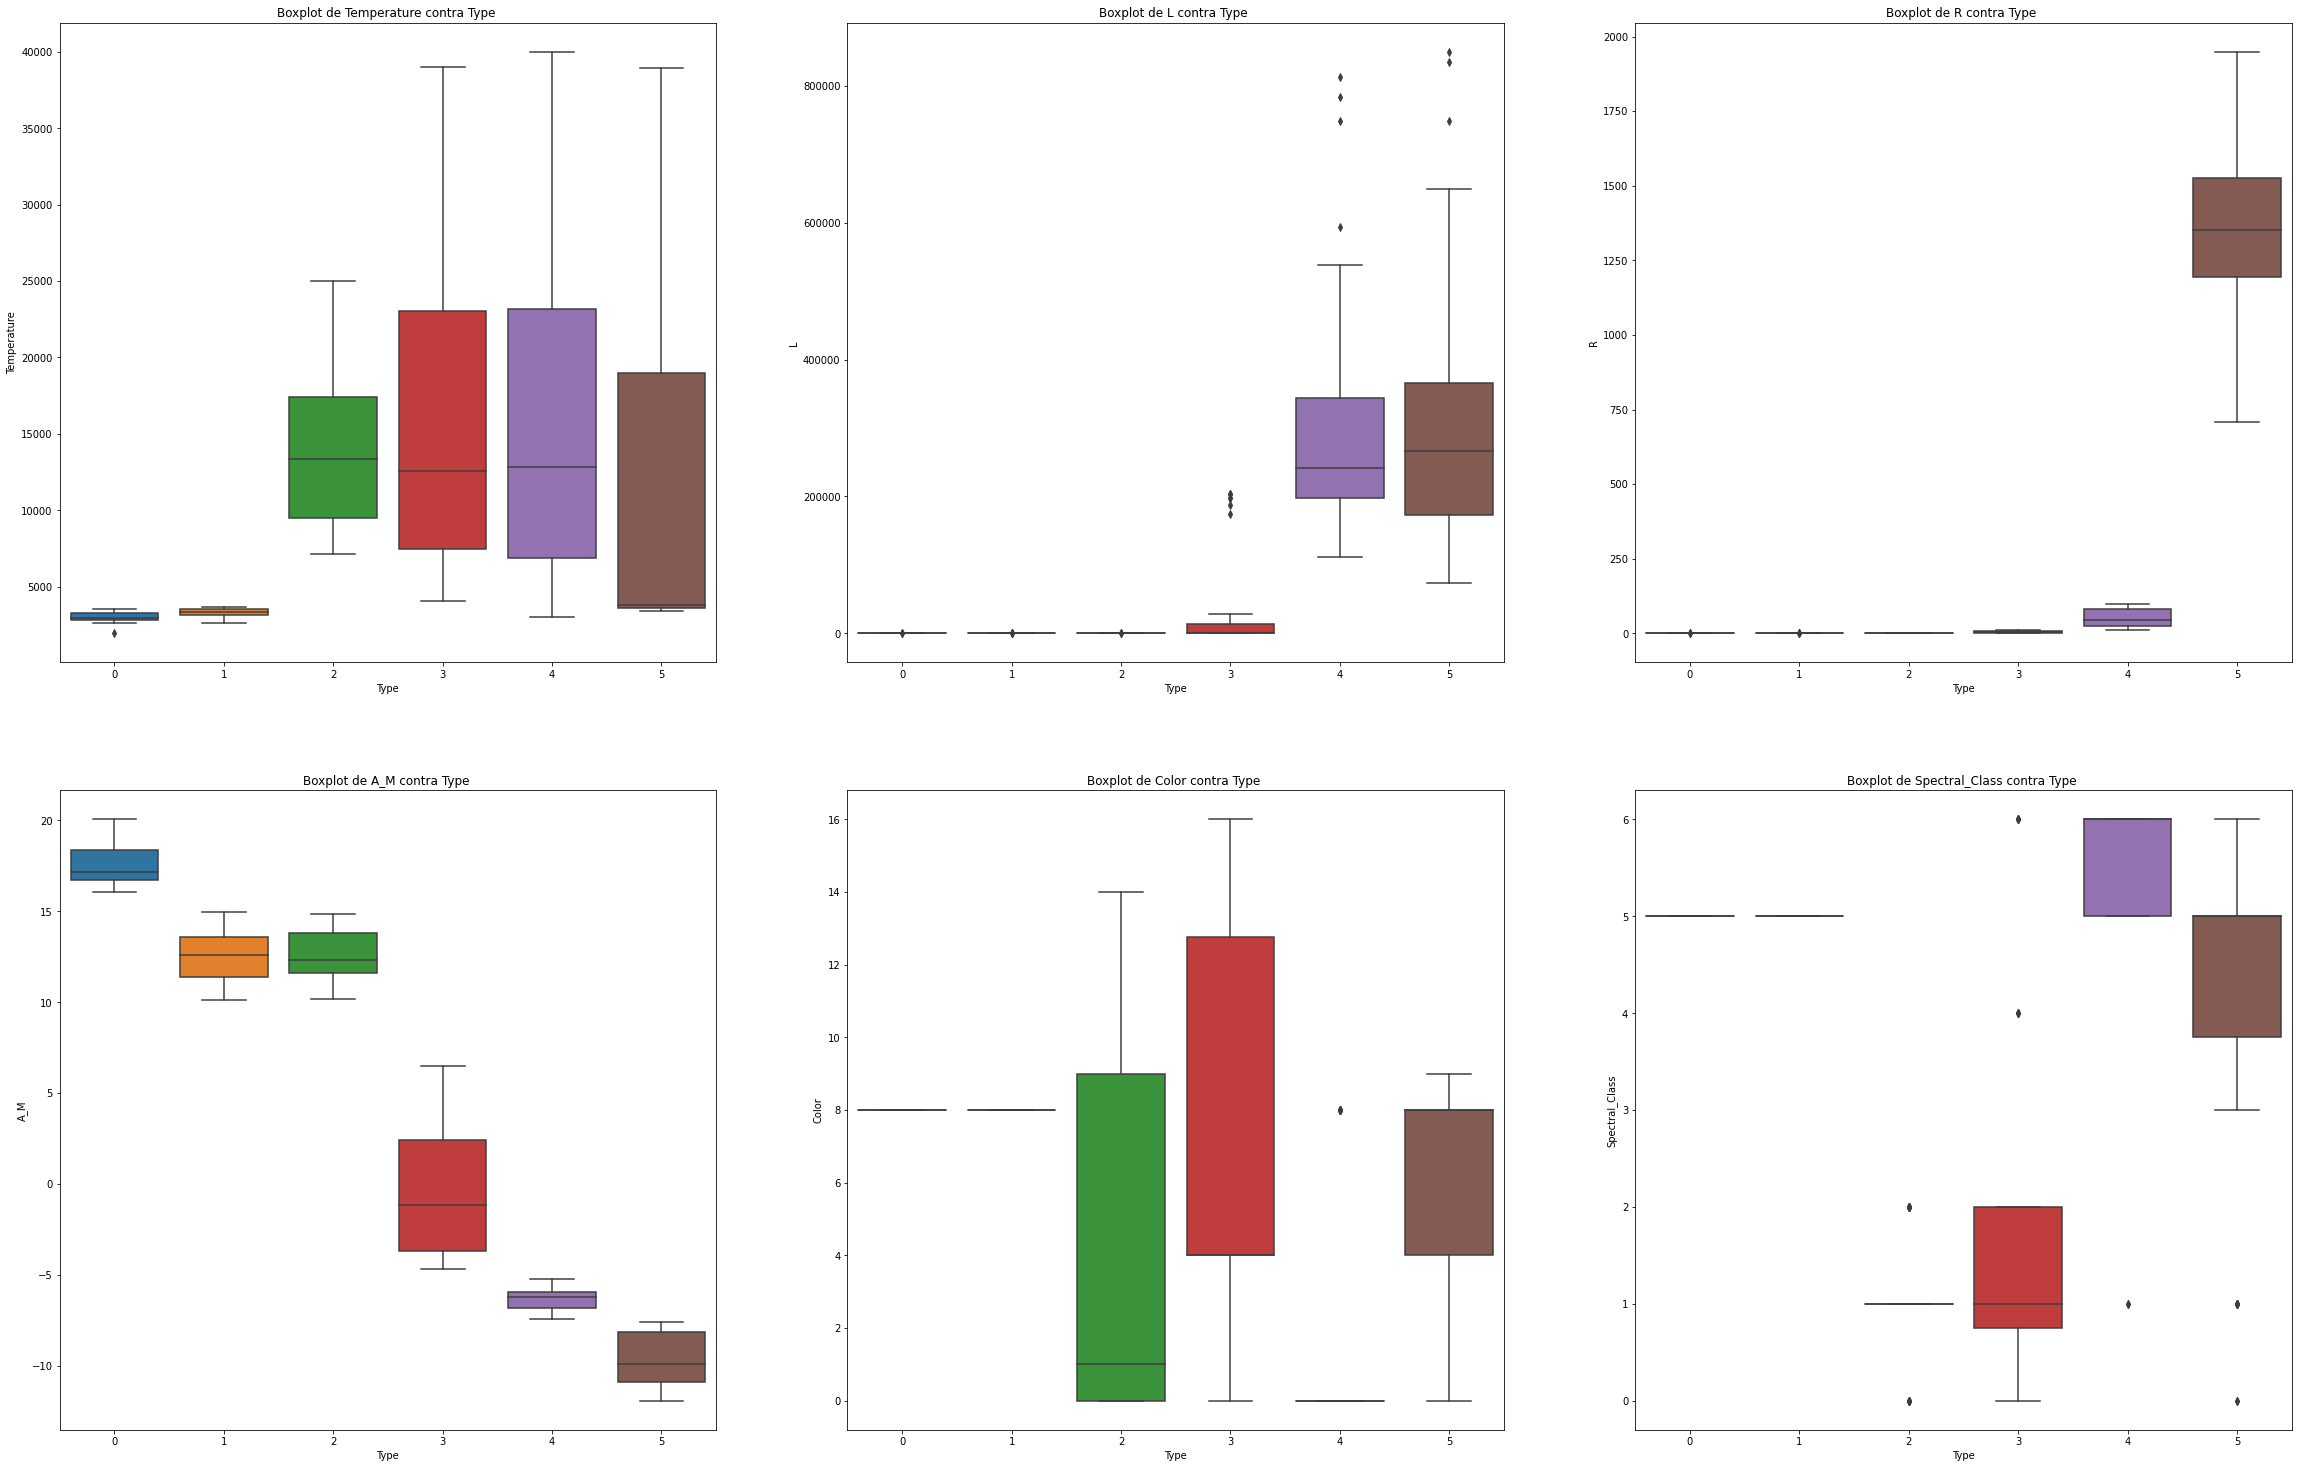

In [10]:
numero=1
plt.figure(figsize=(40,40))
for value in star_type.columns[:6]:
    plt.subplot(3,3,numero)
    plt.title(f"Boxplot de {value} contra Type ")
    sb.boxplot(x=star_type['Type'],y=star_type[value])
    numero+=1
plt.show()

In [11]:
prueba = star_type[star_type['Type']==0]
prueba1 = star_type[star_type['Type']==1]
prueba2 = star_type[star_type['Type']==2]
prueba3 = star_type[star_type['Type']==3]
prueba4 = star_type[star_type['Type']==4]
prueba5 = star_type[star_type['Type']==5]

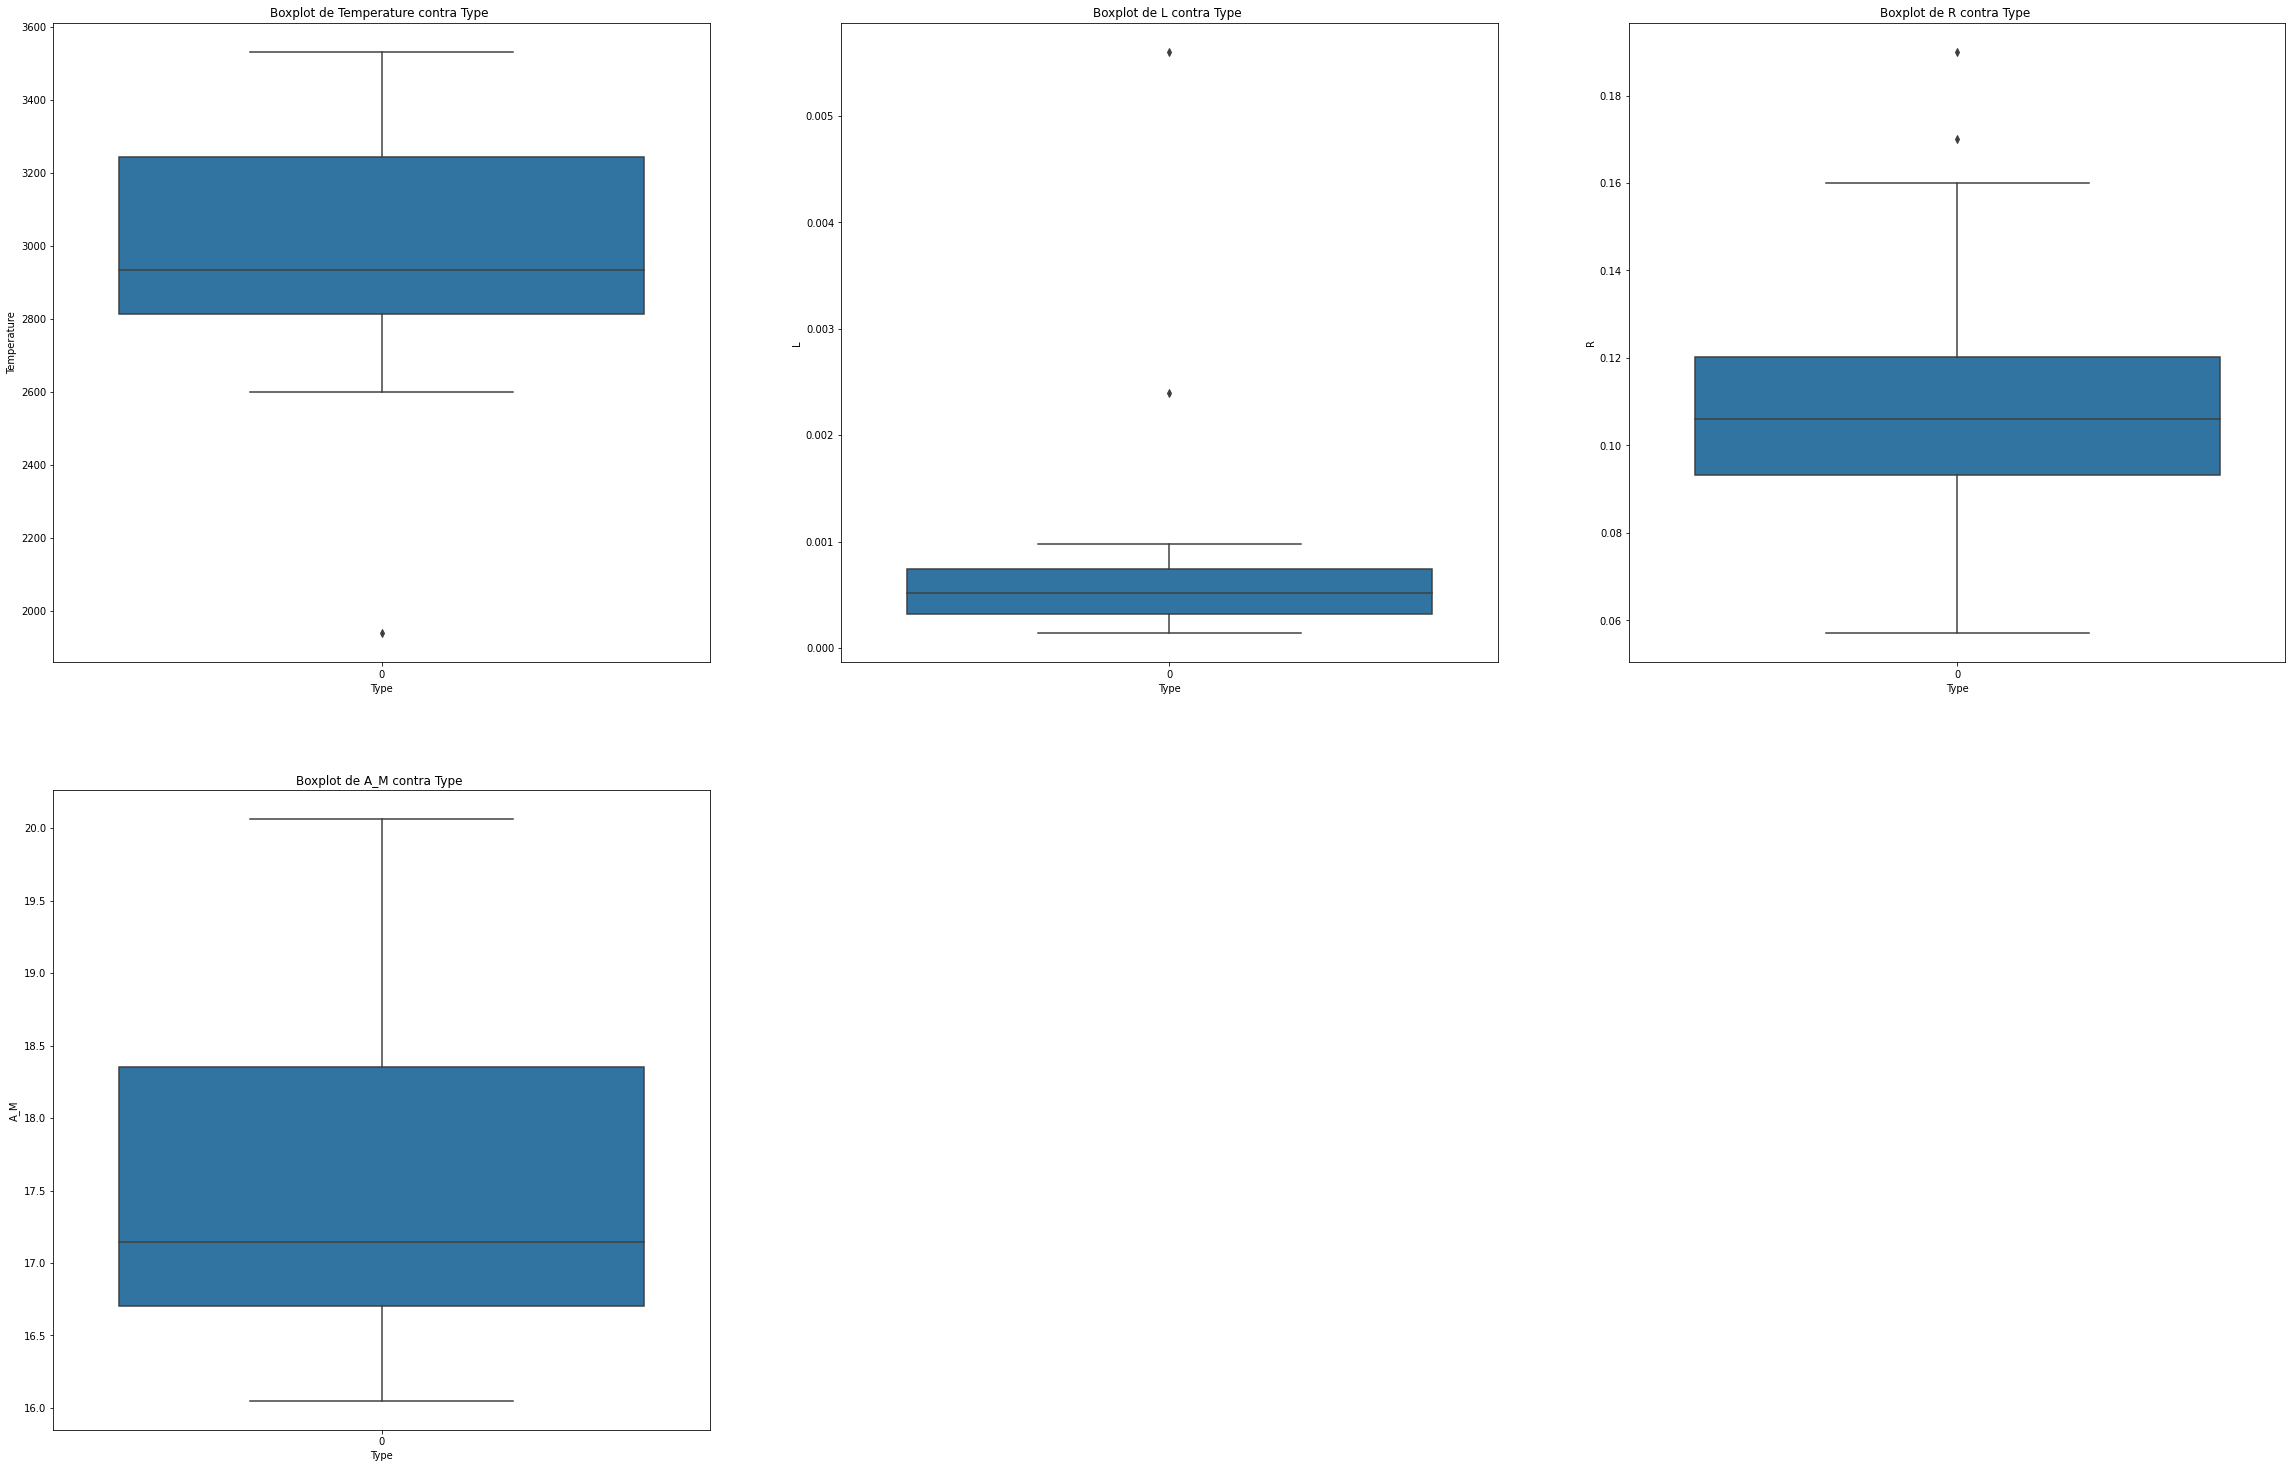

In [12]:
numero=1
plt.figure(figsize=(40,40))
for value in prueba.columns[:4]:
    plt.subplot(3,3,numero)
    plt.title(f"Boxplot de {value} contra Type ")
    sb.boxplot(x=prueba['Type'],y=prueba[value])
    numero+=1
plt.show()

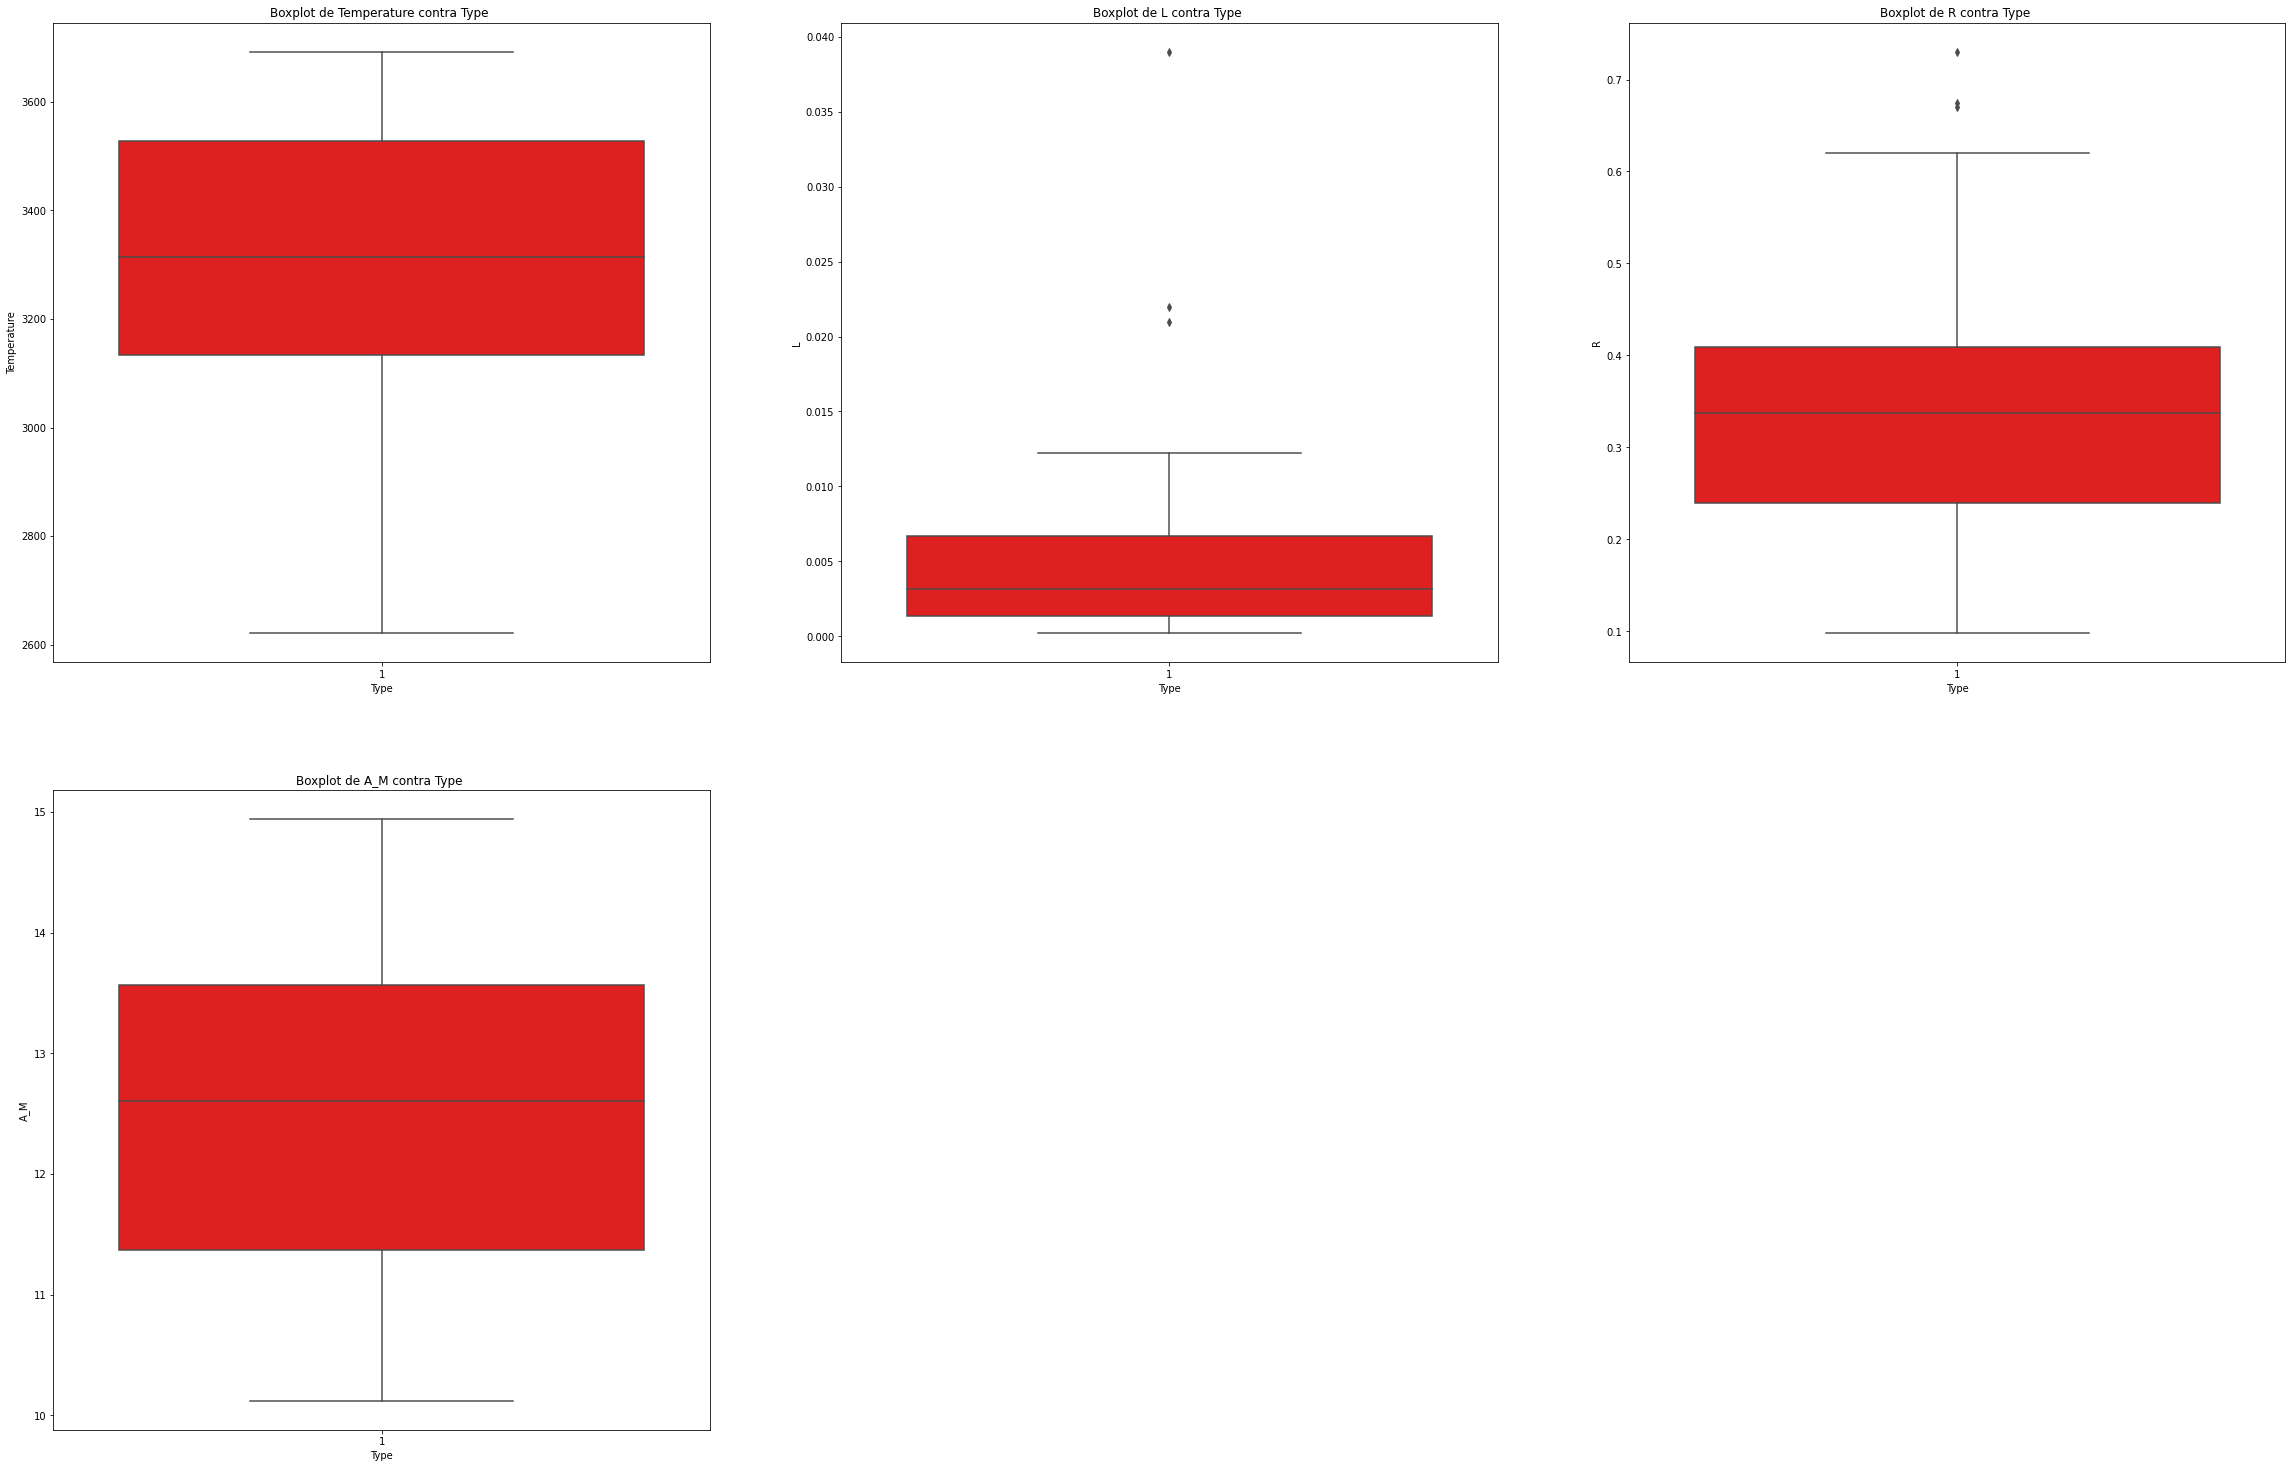

In [13]:
numero=1
plt.figure(figsize=(40,40))
for value in prueba1.columns[:4]:
    plt.subplot(3,3,numero)
    plt.title(f"Boxplot de {value} contra Type ")
    sb.boxplot(x=prueba1['Type'],y=prueba1[value],color = 'red')
    numero+=1
plt.show()

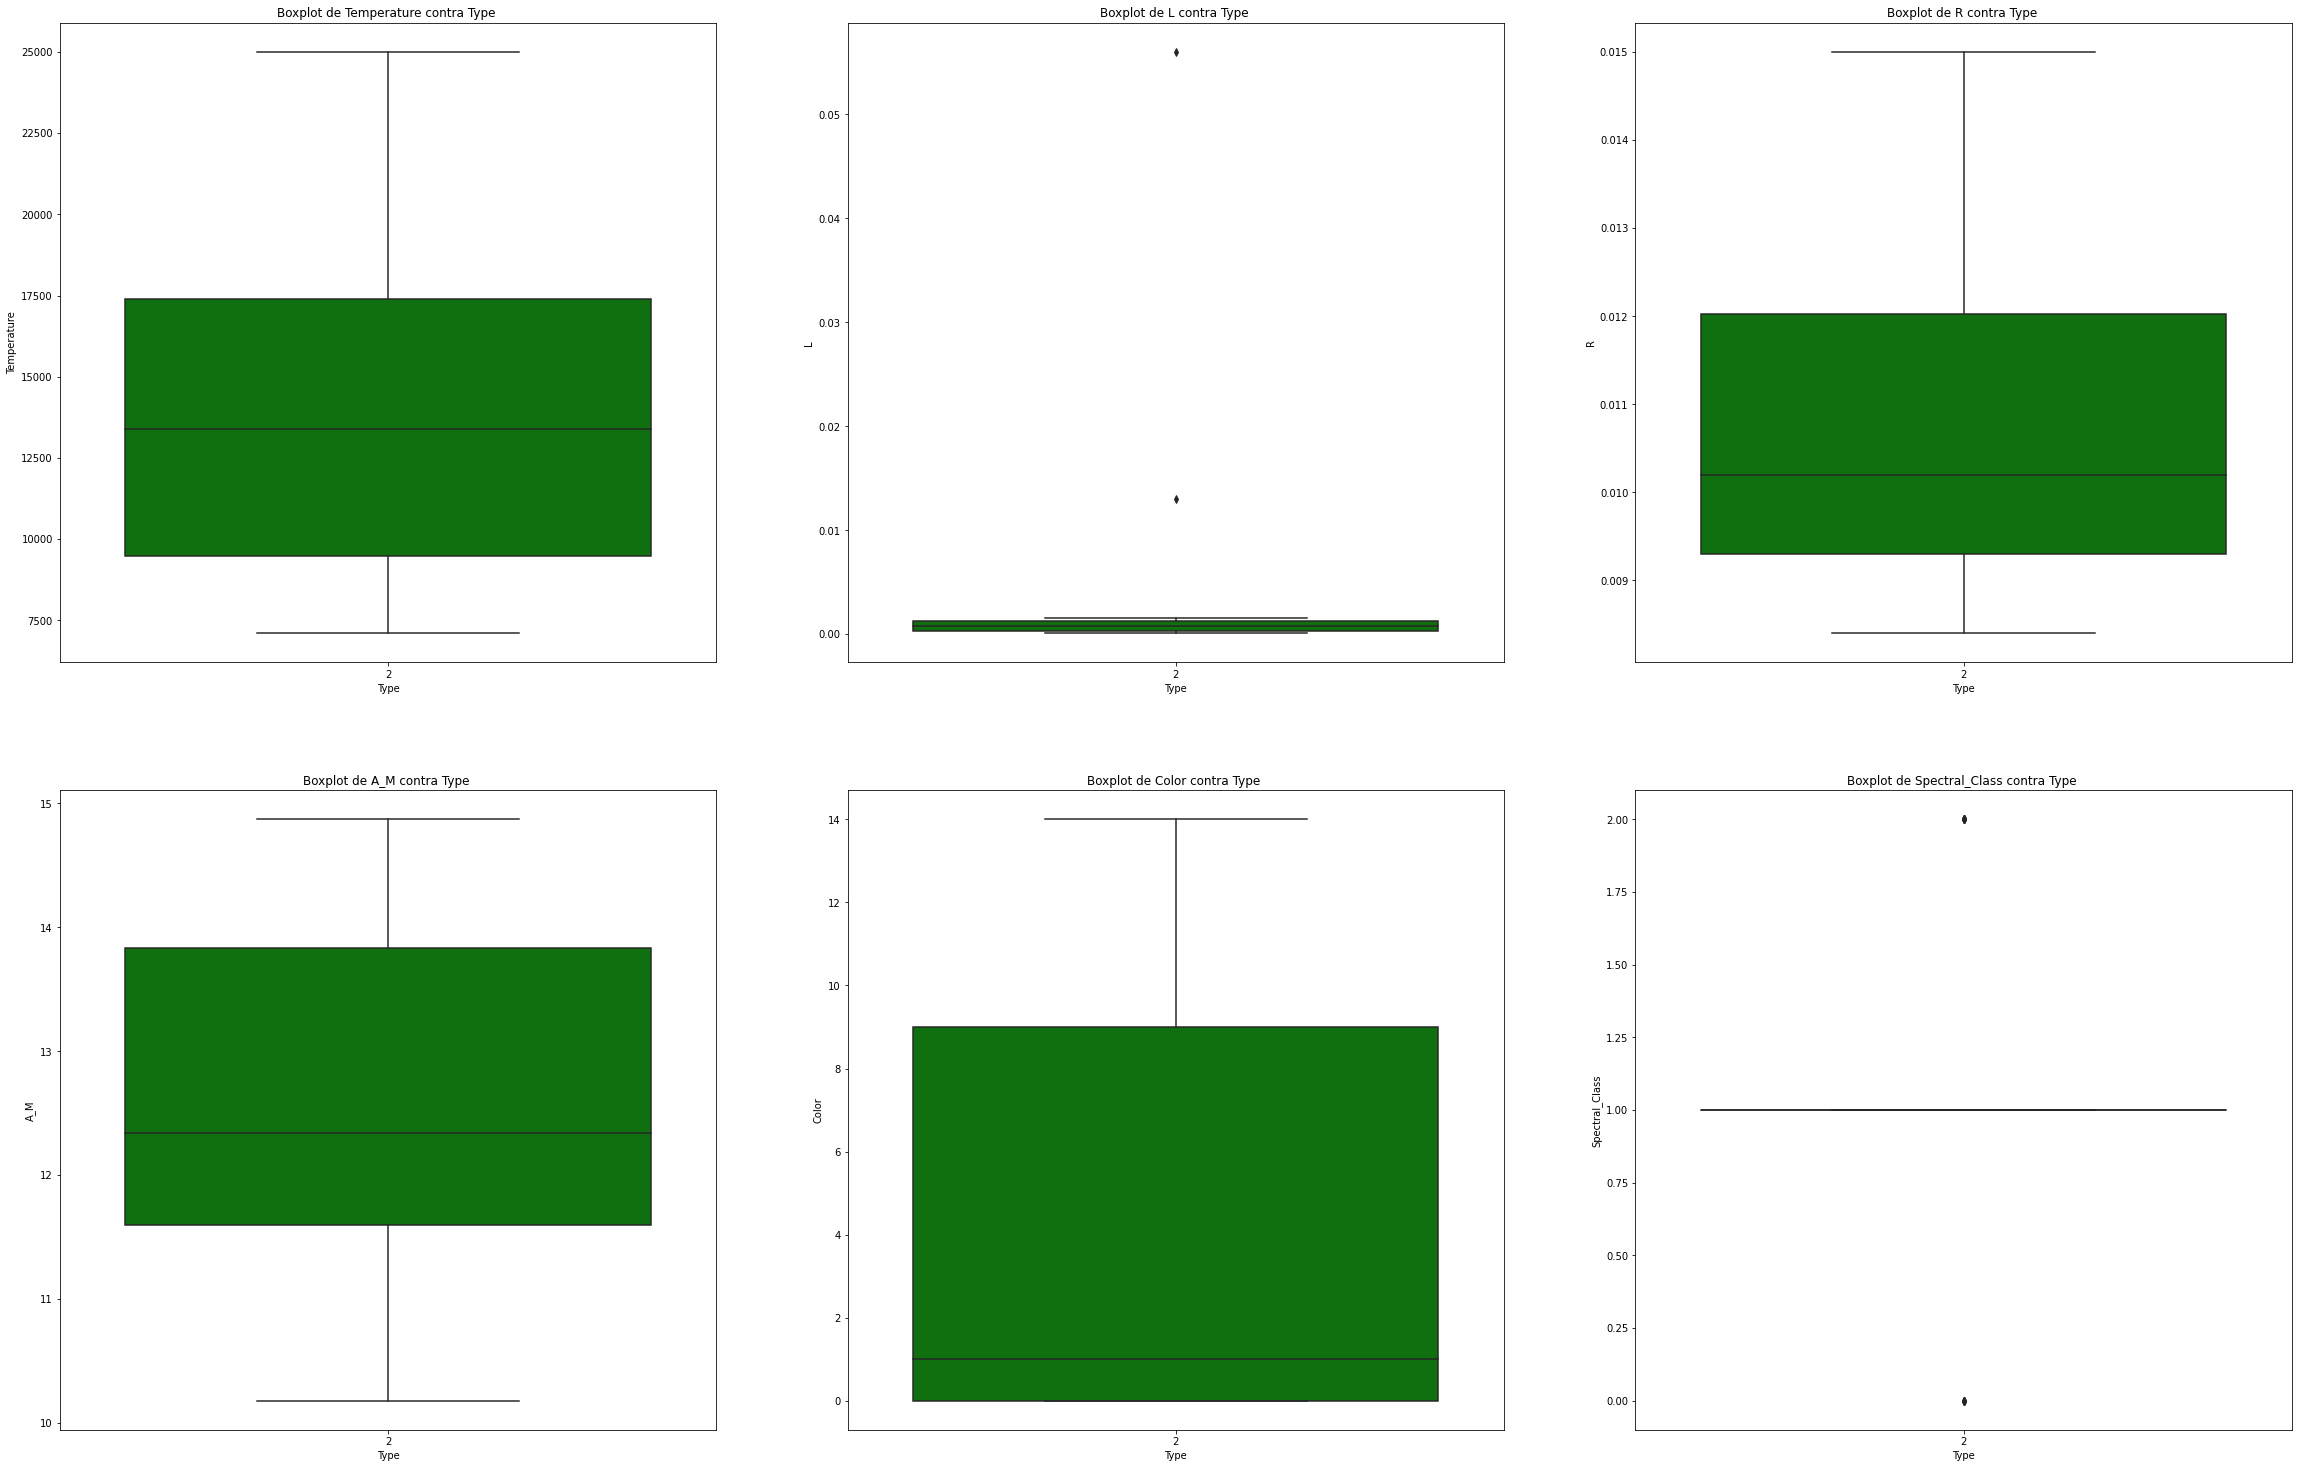

In [14]:
numero=1
plt.figure(figsize=(40,40))
for value in prueba2.columns[:6]:
    plt.subplot(3,3,numero)
    plt.title(f"Boxplot de {value} contra Type ")
    sb.boxplot(x=prueba2['Type'],y=prueba2[value],color = 'green')
    numero+=1
plt.show()

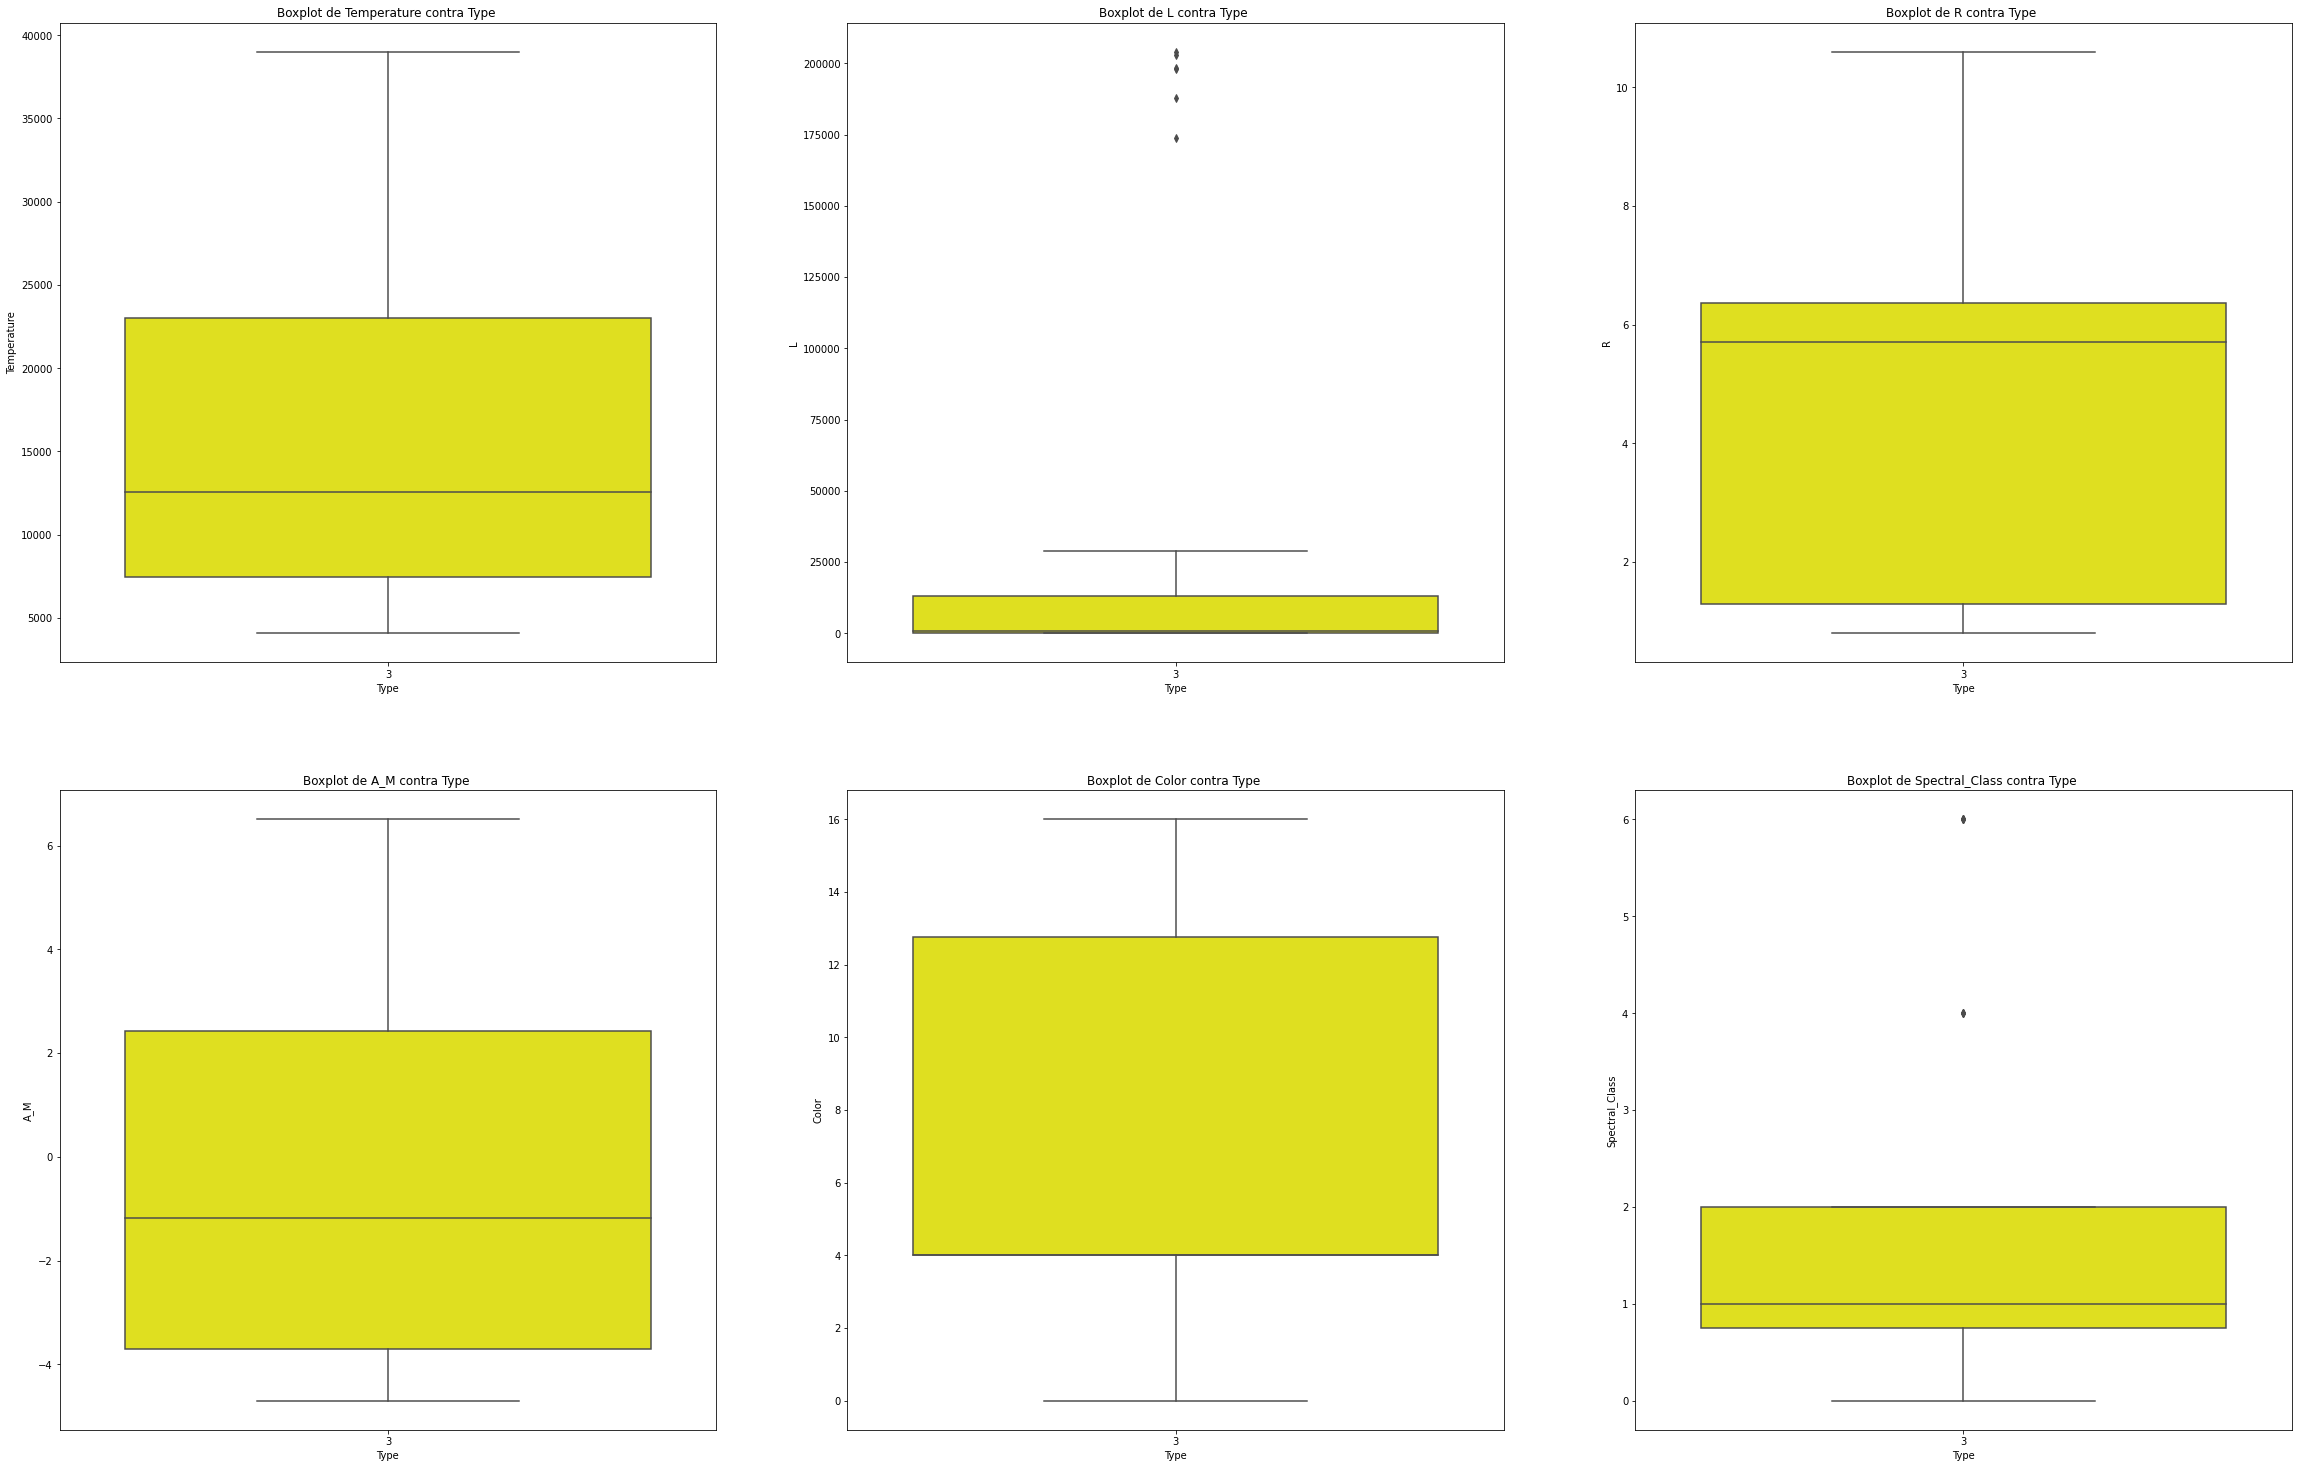

In [15]:
numero=1
plt.figure(figsize=(40,40))
for value in prueba3.columns[:6]:
    plt.subplot(3,3,numero)
    plt.title(f"Boxplot de {value} contra Type ")
    sb.boxplot(x=prueba3['Type'],y=prueba3[value],color = 'yellow')
    numero+=1
plt.show()

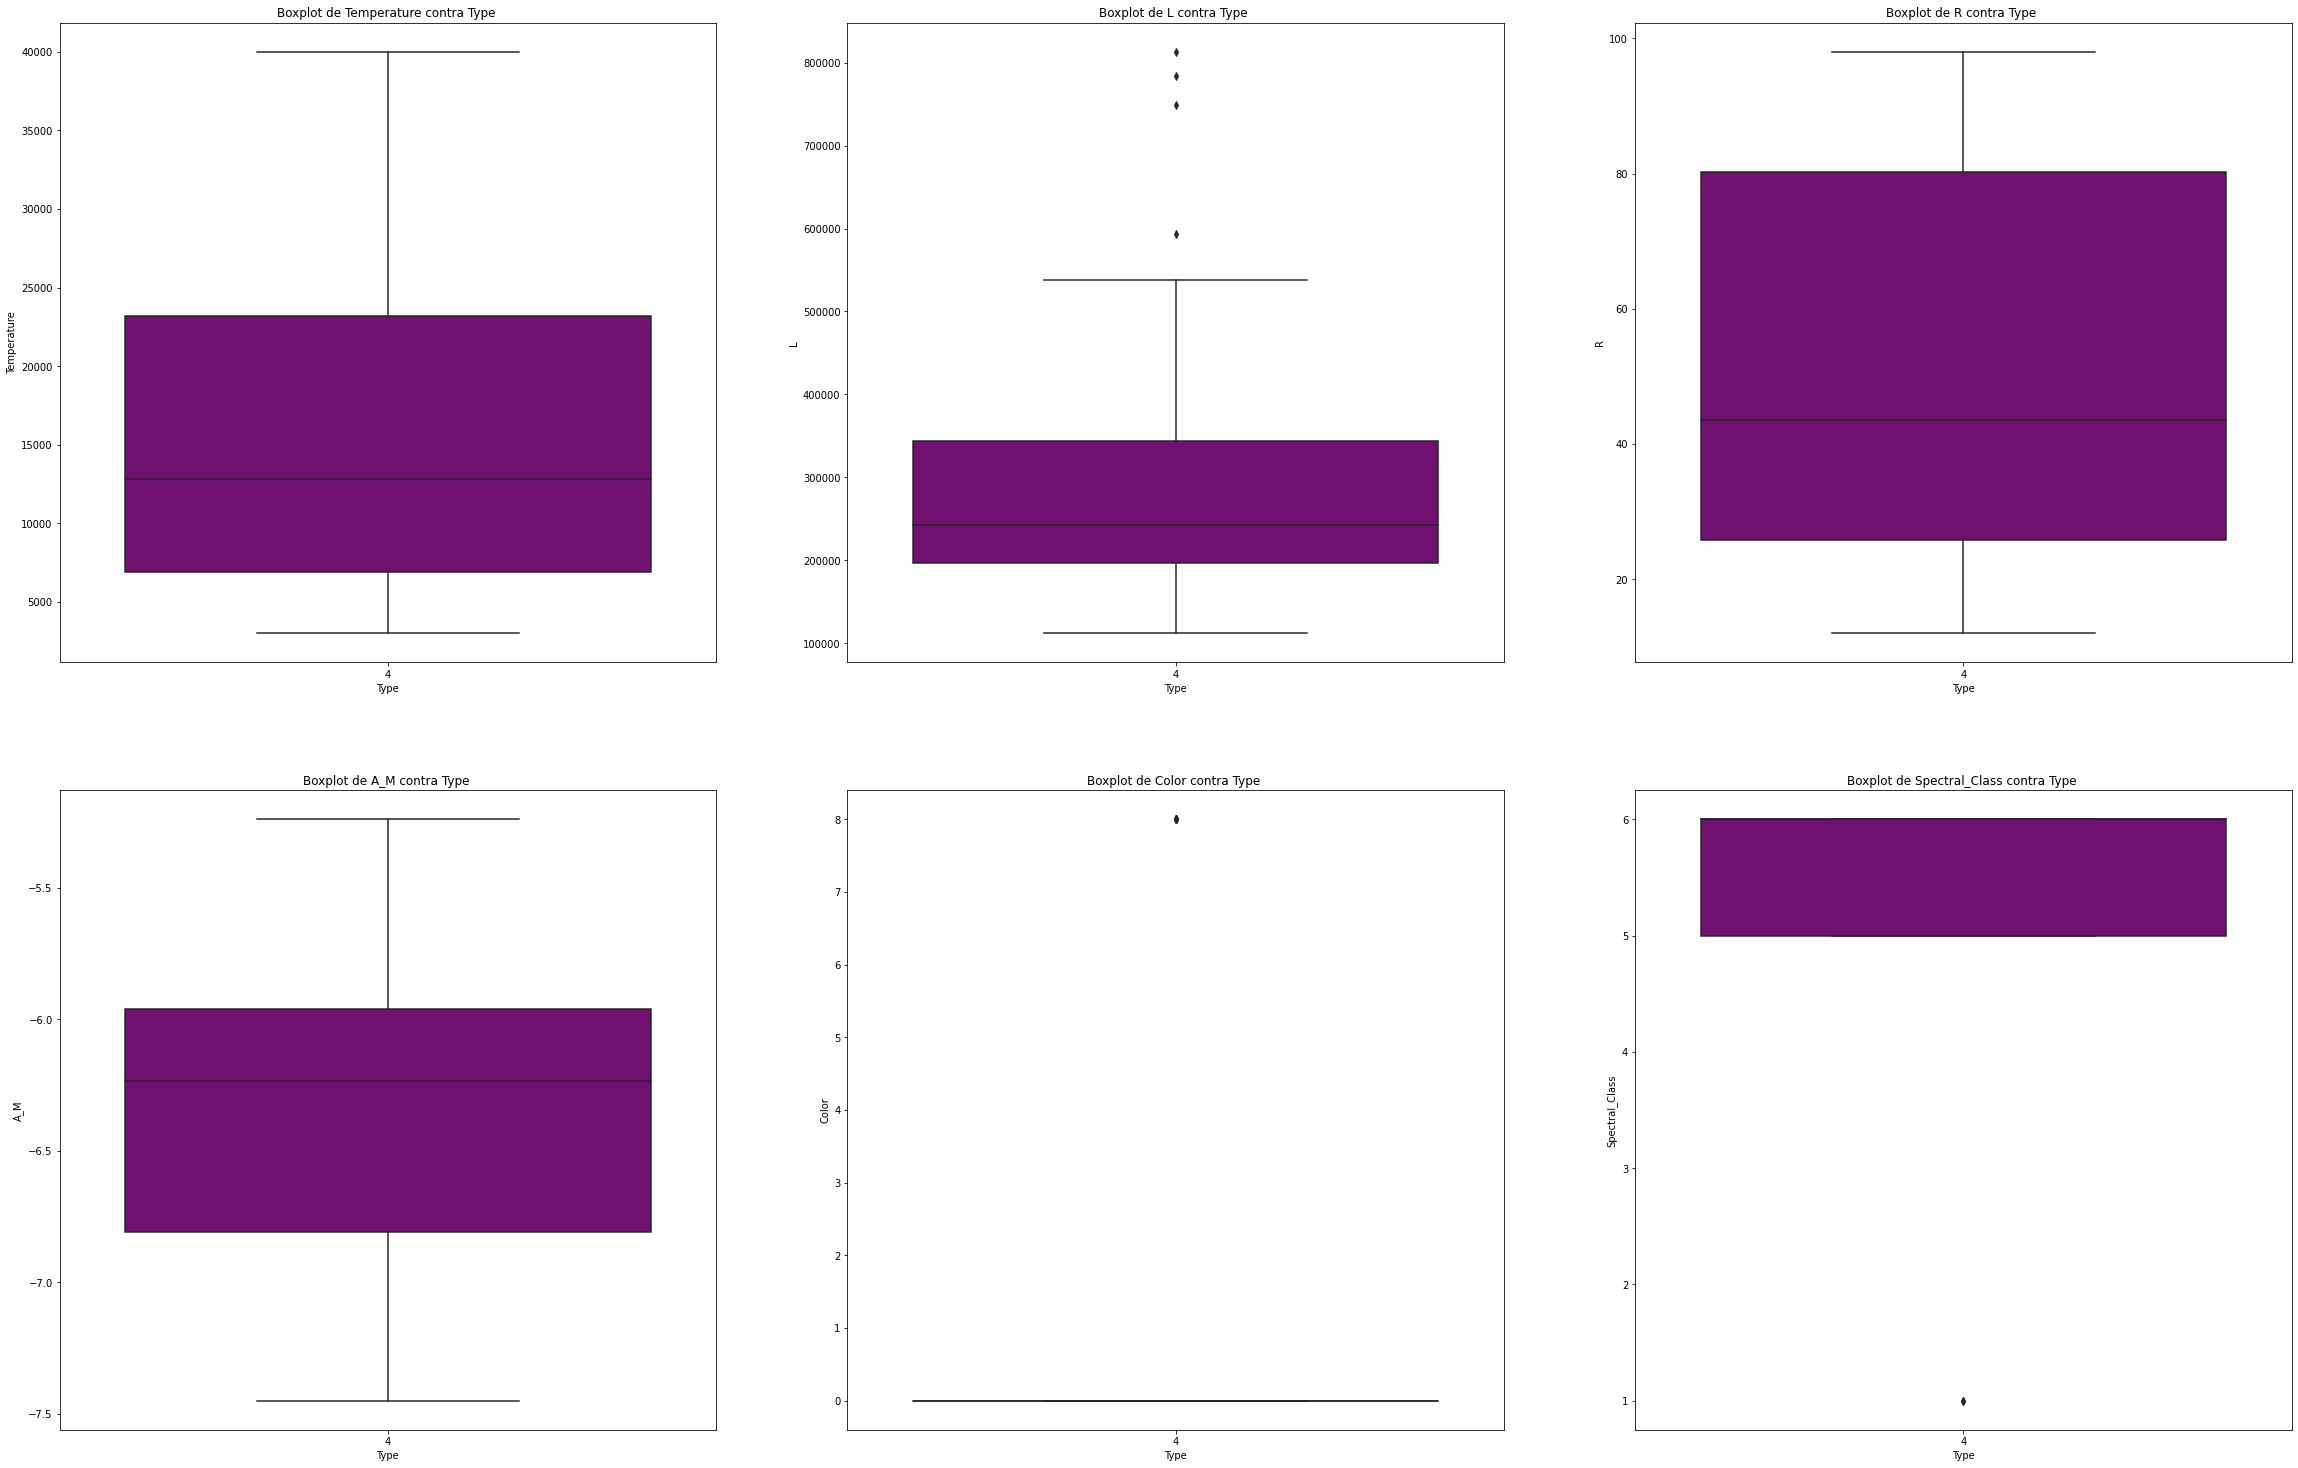

In [16]:
numero=1
plt.figure(figsize=(40,40))
for value in prueba4.columns[:6]:
    plt.subplot(3,3,numero)
    plt.title(f"Boxplot de {value} contra Type ")
    sb.boxplot(x=prueba4['Type'],y=prueba4[value],color = 'purple')
    numero+=1
plt.show()

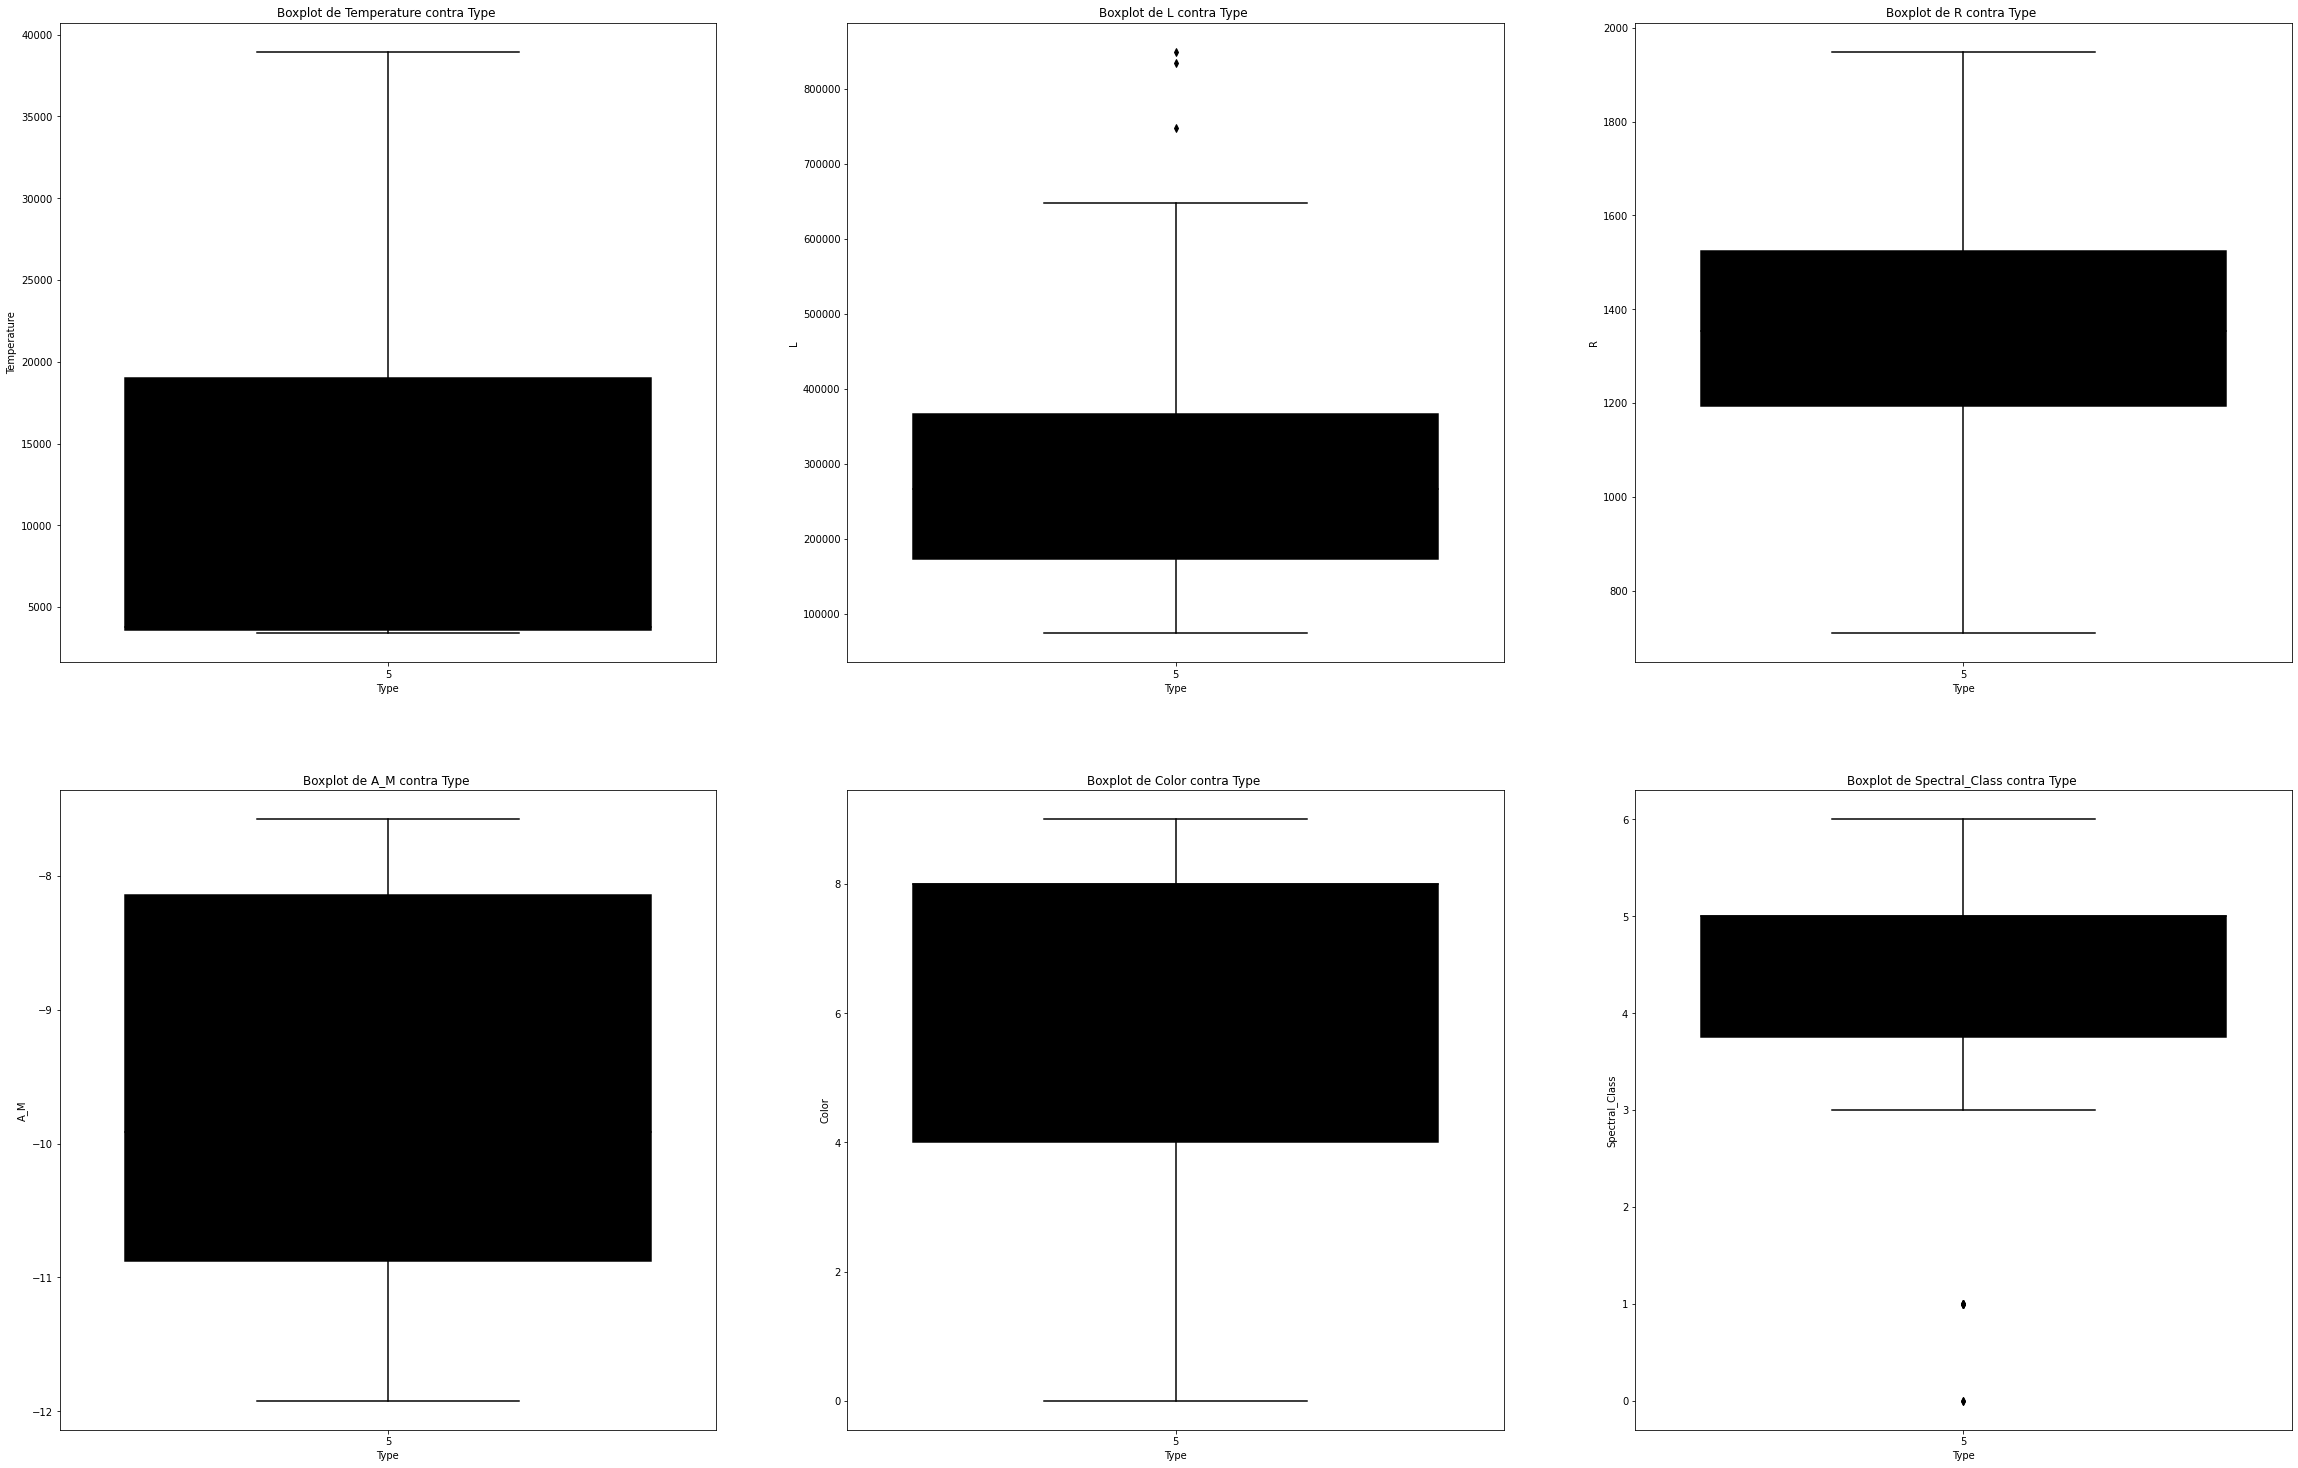

In [17]:
numero=1
plt.figure(figsize=(40,40))
for value in prueba5.columns[:6]:
    plt.subplot(3,3,numero)
    plt.title(f"Boxplot de {value} contra Type ")
    sb.boxplot(x=prueba5['Type'],y=prueba5[value],color = 'black')
    numero+=1
plt.show()

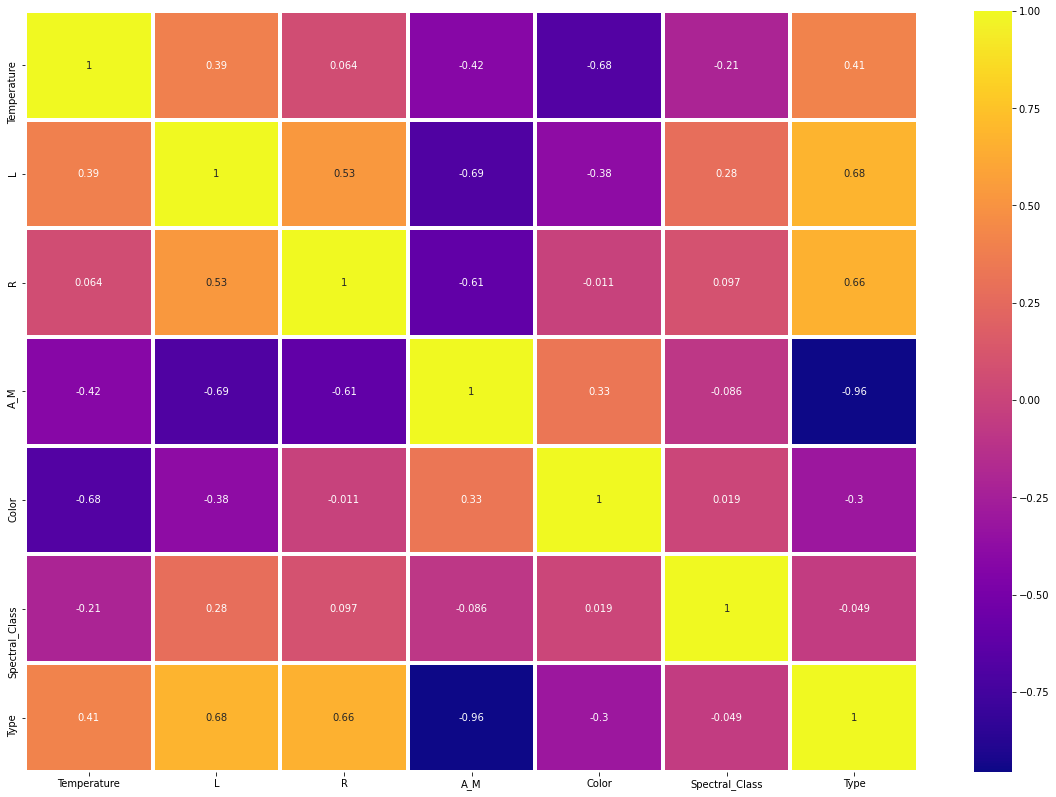

In [18]:
#Veamos la correlacion
plt.figure(figsize=(20,14))
sb.heatmap(star_type.corr(),annot=True,linewidths=3,cmap = 'plasma')

In [19]:
variables = ['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class']
for n in variables:
    obtencion = sm.formula.ols(n +"~ Type", data=star_type).fit()
    p = sms.anova.anova_lm(obtencion)["PR(>F)"][0]
    print(f"El P value de {n} es: {p}")

El P value de Temperature es: 3.323401956092008e-11
El P value de L es: 1.641155523850019e-33
El P value de R es: 1.6272694239287043e-31
El P value de A_M es: 6.33087509199799e-128
El P value de Color es: 1.4684325869920846e-06
El P value de Spectral_Class es: 0.44868186785826514


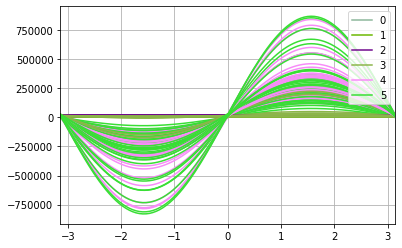

In [20]:
curva = pd.plotting.andrews_curves(star_type, 'Type')
curva.plot()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


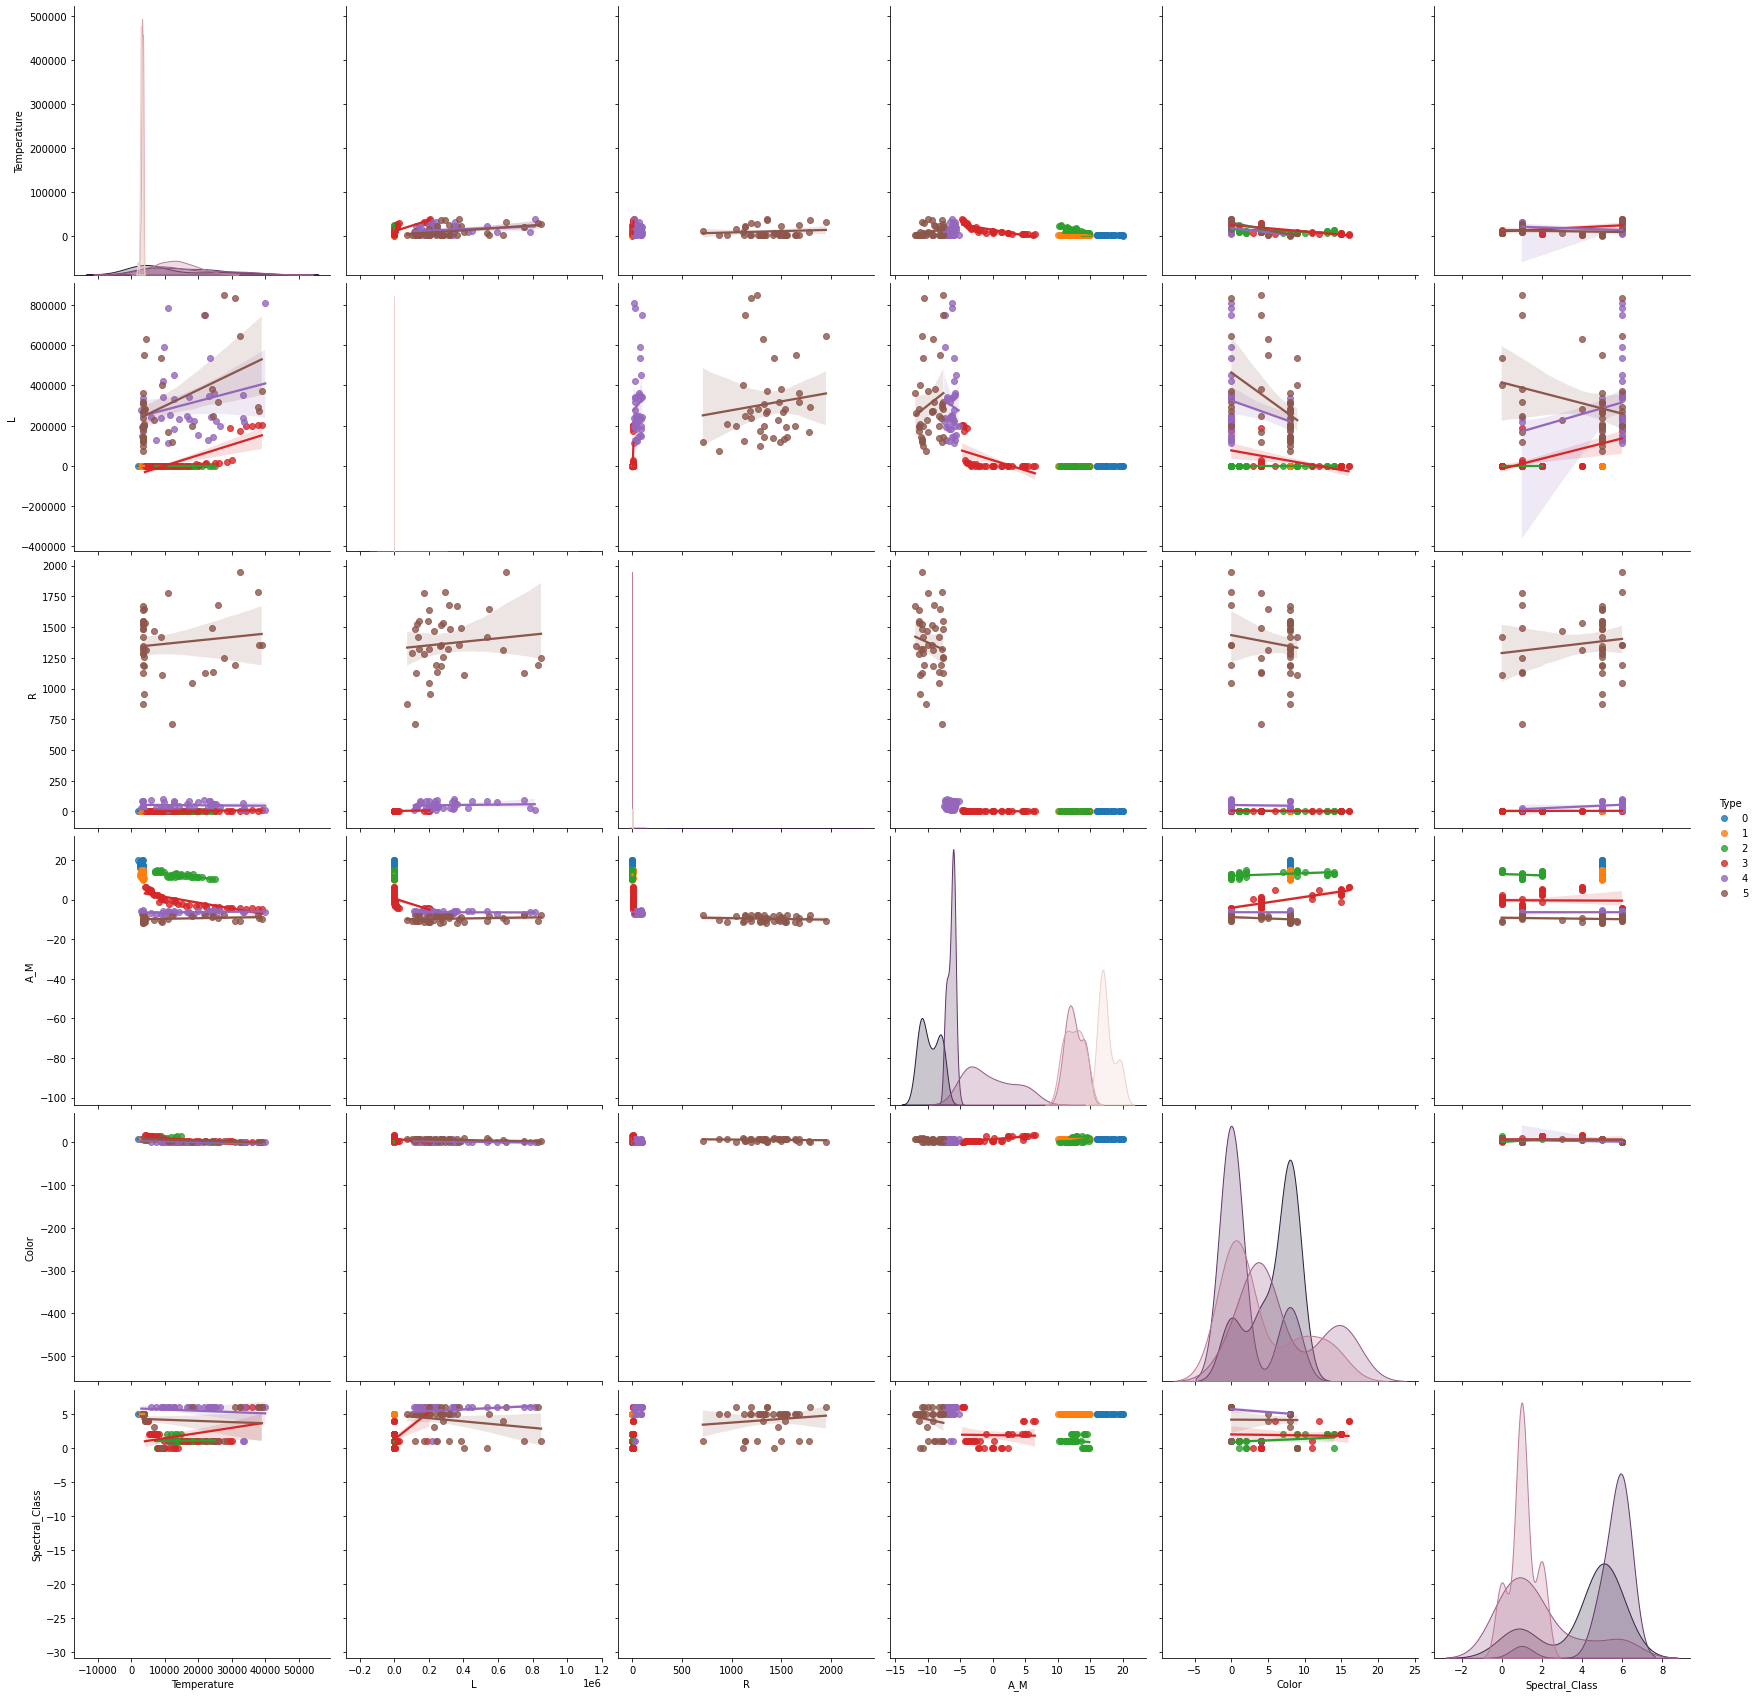

In [21]:
sb.pairplot(star_type, hue='Type',size=4,kind='reg')

In [22]:
#Damos nuestros datos de entrenamiento
X = star_type.drop(['Type'], axis = 1).values
y = star_type['Type'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# K- NEAREST NEIGHBORS 

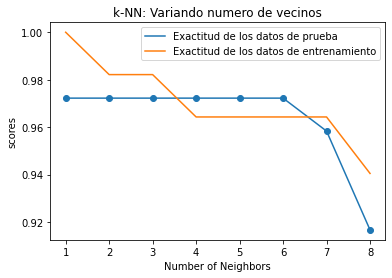

In [23]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
scores=[]
# Damos valores a K
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    scores.append(knn.score(X_test, y_test))
    
plt.title('k-NN: Variando numero de vecinos')
plt.plot(neighbors, test_accuracy, label = 'Exactitud de los datos de prueba')
plt.plot(neighbors, train_accuracy, label = 'Exactitud de los datos de entrenamiento')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('scores')
plt.scatter(neighbors, test_accuracy)
plt.show()

In [24]:
for i in range(2,6):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  print(f"Para K = {i}")
  print('Exactitud en el conjuto de entrenamiento: ', knn.score(X_train, y_train))
  print('Exactitud en el conjuto de prueba: ', knn.score(X_test, y_test))


Para K = 2
Exactitud en el conjuto de entrenamiento:  0.9821428571428571
Exactitud en el conjuto de prueba:  0.9722222222222222
Para K = 3
Exactitud en el conjuto de entrenamiento:  0.9821428571428571
Exactitud en el conjuto de prueba:  0.9722222222222222
Para K = 4
Exactitud en el conjuto de entrenamiento:  0.9642857142857143
Exactitud en el conjuto de prueba:  0.9722222222222222
Para K = 5
Exactitud en el conjuto de entrenamiento:  0.9642857142857143
Exactitud en el conjuto de prueba:  0.9722222222222222


In [25]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[10  0  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  1  0 15  0  0]
 [ 0  0  0  1 12  0]
 [ 0  0  0  0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00         8
           3       0.94      0.94      0.94        16
           4       1.00      0.92      0.96        13
           5       1.00      1.00      1.00        12

    accuracy                           0.97        72
   macro avg       0.98      0.98      0.98        72
weighted avg       0.97      0.97      0.97        72



In [26]:
clf = KNeighborsClassifier(n_neighbors = 5, weights='distance')
clf.fit(X, y)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(clf.score(X, y)))

Accuracy of K-NN classifier on training set: 1.00


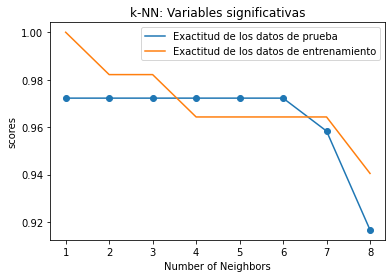

In [27]:
#Variables significativas

X1 = star_type.drop(['Type', 'Color', 'Spectral_Class', 'A_M'], axis = 1).values
y1 = star_type['Type'].values

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.3, random_state=0)
scaler1 = MinMaxScaler()
X_train1 = scaler1.fit_transform(X_train)
X_test1 = scaler1.transform(X_test)

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
scores=[]
# Damos valores a K
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train1, y_train1)
    test_accuracy[i] = knn.score(X_test1, y_test1)
    scores.append(knn.score(X_test1, y_test1))
    
plt.title('k-NN: Variables significativas')
plt.plot(neighbors, test_accuracy, label = 'Exactitud de los datos de prueba')
plt.plot(neighbors, train_accuracy, label = 'Exactitud de los datos de entrenamiento')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('scores')
plt.scatter(neighbors, test_accuracy)
plt.show()

In [28]:
for i in range(2,6):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train1, y_train1)
  print(f"Para K = {i}")
  print('Exactitud en el conjuto de entrenamiento: {:.2f}'
     .format(knn.score(X_train1, y_train1)))
  print('Exactitud en el conjuto de prueba: {:.2f}'
     .format(knn.score(X_test1, y_test1)))

Para K = 2
Exactitud en el conjuto de entrenamiento: 0.98
Exactitud en el conjuto de prueba: 0.97
Para K = 3
Exactitud en el conjuto de entrenamiento: 0.98
Exactitud en el conjuto de prueba: 0.97
Para K = 4
Exactitud en el conjuto de entrenamiento: 0.96
Exactitud en el conjuto de prueba: 0.97
Para K = 5
Exactitud en el conjuto de entrenamiento: 0.96
Exactitud en el conjuto de prueba: 0.97


#Regresión Logistica

In [29]:
from sklearn.linear_model import LogisticRegressionCV

In [30]:
clf = LogisticRegressionCV(multi_class='multinomial', cv = 5, random_state=42, max_iter= 1000, verbose=False).fit(X_train,y_train)
clf.score(X_test,y_test)

0.9861111111111112

In [31]:
clf.score(X_train,y_train)

1.0

In [32]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold
scores = cross_val_score(clf, X, y, scoring='f1_weighted', cv=StratifiedKFold(n_splits=5, shuffle=True), n_jobs=-1)
accuracy = scores.mean()
std = scores.std()

accuracy

0.987450980392157

In [33]:
def Iteracion(iteraciones = 100000):
    for i in range(10):
        numero = 100000 + i*iteraciones
        clf = LogisticRegressionCV(cv = 3,multi_class='multinomial', max_iter= numero).fit(X_train,y_train)
        exactitud = clf.score(X_test,y_test)
        print(f"Con {numero} iteraciones la exactitud es {exactitud} \n")

Iteracion()

Con 100000 iteraciones la exactitud es 0.9861111111111112 

Con 200000 iteraciones la exactitud es 0.9861111111111112 

Con 300000 iteraciones la exactitud es 0.9861111111111112 

Con 400000 iteraciones la exactitud es 0.9861111111111112 

Con 500000 iteraciones la exactitud es 0.9861111111111112 

Con 600000 iteraciones la exactitud es 0.9861111111111112 

Con 700000 iteraciones la exactitud es 0.9861111111111112 

Con 800000 iteraciones la exactitud es 0.9861111111111112 

Con 900000 iteraciones la exactitud es 0.9861111111111112 

Con 1000000 iteraciones la exactitud es 0.9861111111111112 



In [34]:
clf = LogisticRegressionCV(multi_class='multinomial', cv = 5, random_state=42, max_iter= 1000, verbose=False).fit(X_train1,y_train1)
clf.score(X_test1,y_test1)

0.9861111111111112

In [35]:
scores = cross_val_score(clf, X1, y1, scoring='f1_weighted', cv=StratifiedKFold(n_splits=5, shuffle=True), n_jobs=-1)
accuracy = scores.mean()
std = scores.std()

accuracy

0.9284343210968599

In [36]:
#Variables significativas
def Varsig(iteraciones = 100000):
    for i in range(10):
        numero = 100000 + i*iteraciones
        clf = LogisticRegressionCV(cv = 3,multi_class='multinomial', max_iter= numero).fit(X_train1,y_train1)
        accurancy = clf.score(X_test1,y_test1)
        print(f"Con {numero} iteraciones la exactitud es {accurancy} \n")

Varsig()

Con 100000 iteraciones la exactitud es 0.9861111111111112 

Con 200000 iteraciones la exactitud es 0.9861111111111112 

Con 300000 iteraciones la exactitud es 0.9861111111111112 

Con 400000 iteraciones la exactitud es 0.9861111111111112 

Con 500000 iteraciones la exactitud es 0.9861111111111112 

Con 600000 iteraciones la exactitud es 0.9861111111111112 

Con 700000 iteraciones la exactitud es 0.9861111111111112 

Con 800000 iteraciones la exactitud es 0.9861111111111112 

Con 900000 iteraciones la exactitud es 0.9861111111111112 

Con 1000000 iteraciones la exactitud es 0.9861111111111112 

